<a href="https://colab.research.google.com/github/jjone36/Colab/blob/master/97.%20cnn_digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Image classification 

reference : [Kaggle Kernel by Yassine Ghouzam](https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook')

import os

## 1. Import data

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
from getpass import getpass
user = 'jjone36'
key = 'cf8dcde20a60798fe4fb91b2ba5158e8'

if '.kaggle' not in os.listdir('/root'):
    !mkdir ~/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 666 /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write('{"username":"%s","key":"%s"}' % (user, key))
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c digit-recognizer

 98% 72.0M/73.2M [00:00<00:00, 77.0MB/s]
100% 73.2M/73.2M [00:00<00:00, 79.5MB/s]
 68% 33.0M/48.8M [00:00<00:00, 57.5MB/s]
100% 48.8M/48.8M [00:00<00:00, 122MB/s] 
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 200MB/s]


In [0]:
# Import data
tr = pd.read_csv('train.csv')
te = pd.read_csv('test.csv')

In [6]:
tr.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train = tr.label
X_train = tr.iloc[:, 1:]

In [0]:
X_test = te

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


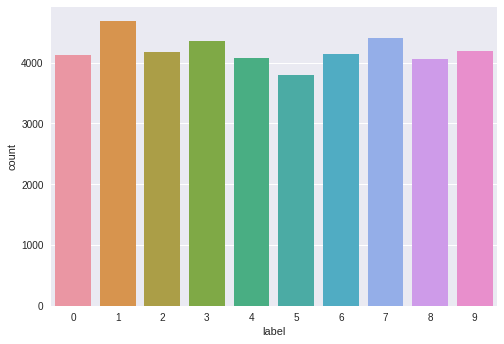

In [9]:
# distribution of y labels
sns.countplot(data = tr, x = 'label')

In [10]:
# Check NA in labels
y_train.isnull().sum()

0

In [0]:
# Check NA in X_train
assert (X_train.notnull().all)

There is no empty values in both X and y 

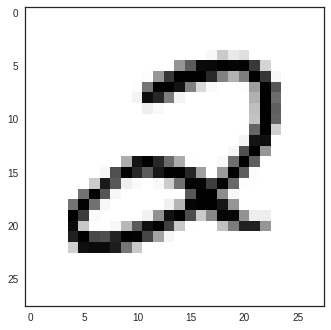

In [43]:
plt.imshow(X_train[27][:, :, 0])

## Preprocessing

In [12]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
n_pixel = len(X_train.columns)
a = np.sqrt(n_pixel)

im_len = int(a)
im_size = (im_len, im_len) 

In [0]:
X_train = X_train / 255.
X_test = X_test / 255.

In [0]:
# Transform into array
X_train = X_train.values.reshape(-1, im_len, im_len, 1)
X_test = X_test.values.reshape(-1, im_len, im_len, 1)

In [0]:
# Number of labels
n_class = y_train.nunique()

# Encoding 
y_train = pd.get_dummies(y_train)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .2, random_state = 25)

## Modeling with Keras

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

Using TensorFlow backend.


In [0]:
# Initialize
model = Sequential()

# ConvNet_1
model.add(Conv2D(32, kernel_size = 3, input_shape = (im_len, im_len, 1), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(MaxPool2D(2, strides = 2))

# ConvNet_2
model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(Conv2D(64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(2, strides = 2))

# Flattening
model.add(Flatten())

# Fully-connected
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(.2))

# Softmax
model.add(Dense(n_class, activation = 'softmax'))

# Compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
__________

In [0]:
# Callback
from keras.callbacks import EarlyStopping
stopper = EarlyStopping(patience = 3)

from keras.callbacks import ReduceLROnPlateau
reducer = ReduceLROnPlateau(monitor = 'val_acc',
                           patience = 3,
                           verbose = 1,
                           factor = .5,
                           min_lr = 0.00001)

callbacks = [stopper, reducer]

## Fitting

In [27]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_split = .2, verbose = True)

Train on 26880 samples, validate on 6720 samples
Epoch 1/10
26880/26880 [==============================] - 11s 422us/step - loss: 0.2404 - acc: 0.9232 - val_loss: 0.0656 - val_acc: 0.9787
Epoch 2/10
26880/26880 [==============================] - 7s 248us/step - loss: 0.0590 - acc: 0.9815 - val_loss: 0.0550 - val_acc: 0.9832
Epoch 3/10
26880/26880 [==============================] - 7s 250us/step - loss: 0.0371 - acc: 0.9885 - val_loss: 0.0505 - val_acc: 0.9865
Epoch 4/10
26880/26880 [==============================] - 7s 249us/step - loss: 0.0318 - acc: 0.9899 - val_loss: 0.0356 - val_acc: 0.9896
Epoch 5/10
26880/26880 [==============================] - 7s 249us/step - loss: 0.0263 - acc: 0.9913 - val_loss: 0.0441 - val_acc: 0.9874
Epoch 6/10
26880/26880 [==============================] - 7s 248us/step - loss: 0.0171 - acc: 0.9946 - val_loss: 0.0364 - val_acc: 0.9896
Epoch 7/10
26880/26880 [==============================] - 7s 249us/step - loss: 0.0161 - acc: 0.9954 - val_loss: 0.0406 - 

In [30]:
history.history['loss']

[0.2404163493497652,
 0.05899863723731999,
 0.03707130132499428,
 0.03180263700104704,
 0.026258018080781247,
 0.017130463524743043,
 0.01606547615199902,
 0.01569755155477911,
 0.01461306513451529,
 0.013929160414352822]

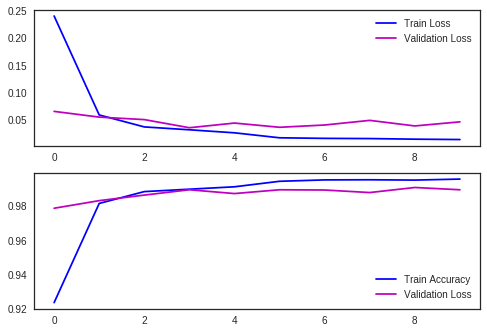

In [37]:
# Train and validation curves
fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot(history.history['loss'], color = 'b', label = 'Train Loss')
ax1.plot(history.history['val_loss'], color = 'm', label = 'Validation Loss')
ax1.legend(loc = 'best')

ax2.plot(history.history['acc'], color = 'b', label = 'Train Accuracy')
ax2.plot(history.history['val_acc'], color = 'm', label = 'Validation Loss')
ax2.legend(loc = 'best')